In [ ]:
Coderscave

Task: Exploratory Data Analysis - Google Play Store App

Name: Kavya Rao

In [1]:
# importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for data visualization 
import plotly.express as px       # for data visualization
from sklearn.impute import SimpleImputer

In [2]:
#importing Data
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head(10)


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   
6     178   19M      50,000+  Free     0       Everyone   
7   36815   29M   1,000,000+  Free     0       Everyone   
8   13791   33M   1,000,000+  Free     0       Everyone   
9     121  3.1M      10,000+  Free     0       Everyone   

                      Genres        Last Updated         Current Ver  \
0               Art & Design     January 7, 2018               1.0.0   
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up  
5    2.3 and up  
6  4.0.3 and up  
7    4.2 and up  
8    3.0 and up  
9  4.0.3 and up

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
# Checking for any Duplicated Entries
df.duplicated().sum()

483

In [7]:
#Detecting missing values
df.isna().sum()
df.dropna(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
#after removing null values
df.shape


(8886, 13)

In [10]:
df.dtypes  # Displaying Data types of each feature.


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
df.Reviews = df.Reviews.astype('int64') #Changing to int type.


In [12]:
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')


C:\Users\kavya\AppData\Local\Temp\ipykernel_19564\2163064291.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


In [13]:
df.Installs = df.Installs.astype('float') #Changing to  type.


In [14]:
#size
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [15]:
#Price
df['Price'] = df['Price'].str.replace('$', '')

C:\Users\kavya\AppData\Local\Temp\ipykernel_19564\1834152553.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [16]:
df.Price = df.Price.astype('float') #Changing to  type.


In [17]:
#Android Vers

newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

<AxesSubplot:>

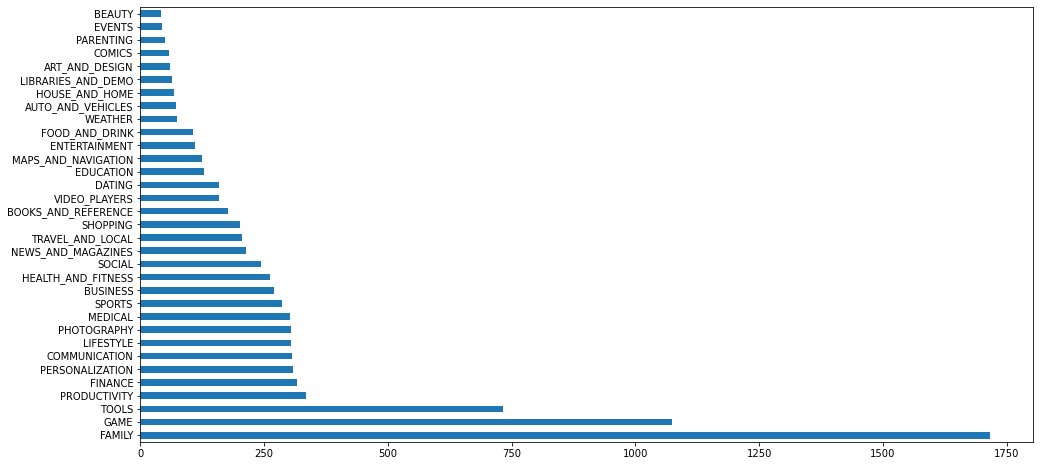

In [18]:
df.Category.value_counts().plot(kind='barh',figsize= (16,8)) 

<AxesSubplot:>

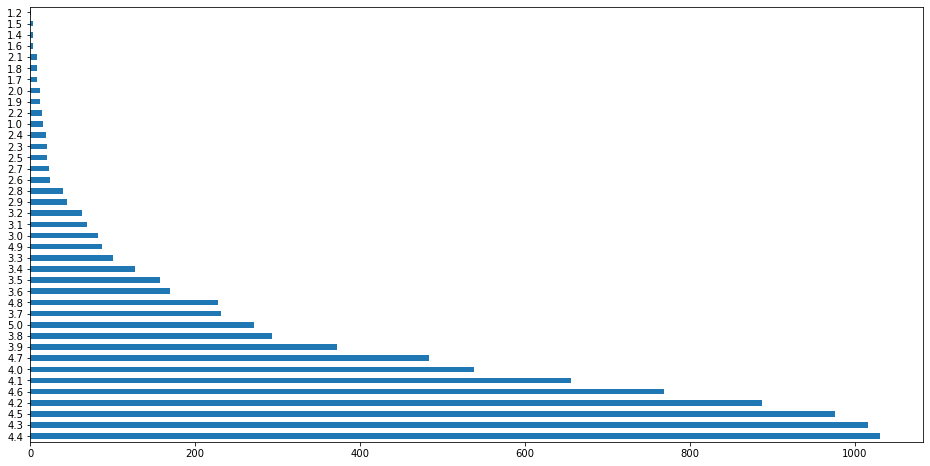

In [19]:
df.Rating.value_counts().plot(kind='barh',figsize= (16,8)) 

C:\Users\kavya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

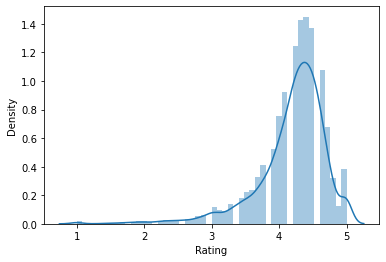

In [20]:
sns.distplot(df.Rating)   


In [21]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())


No. of Apps with full ratings:  271


In [22]:
df[df.Reviews>60000000]


App       Category  Rating   Reviews  Size      Installs  \
336   WhatsApp Messenger  COMMUNICATION     4.4  69119316   0.0  1.000000e+09   
2544            Facebook         SOCIAL     4.1  78158306   0.0  1.000000e+09   
2545           Instagram         SOCIAL     4.5  66577313   0.0  1.000000e+09   
2604           Instagram         SOCIAL     4.5  66577446   0.0  1.000000e+09   
3904  WhatsApp Messenger  COMMUNICATION     4.4  69109672   0.0  1.000000e+09   
3909           Instagram         SOCIAL     4.5  66509917   0.0  1.000000e+09   
3943            Facebook         SOCIAL     4.1  78128208   0.0  1.000000e+09   

      Type  Price Content Rating         Genres    Last Updated  \
336   Free    0.0       Everyone  Communication  August 3, 2018   
2544  Free    0.0           Teen         Social  August 3, 2018   
2545  Free    0.0           Teen         Social   July 31, 2018   
2604  Free    0.0           Teen         Social   July 31, 2018   
3904  Free    0.0       Everyone  Communication  August 3, 2018   
3909  Free    0.0           Teen         Social   July 31, 2018   
3943  Free    0.0           Teen         Social  August 3, 2018   

             Current Ver  Android Ver  
336   Varies with device          0.0  
2544  Varies with device          0.0  
2545  Varies with device          0.0  
2604  Varies with device          0.0  
3904  Varies with device          0.0  
3909  Varies with device          0.0  
3943  Varies with device          0.0

([<matplotlib.patches.Wedge at 0x19ae07466d0>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

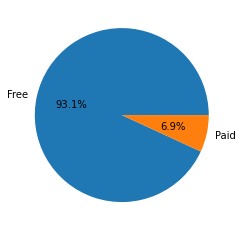

In [23]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%') 


In [24]:
df[df.Price == df.Price.max()] #Insight : The most costly App in the Store is: I'm Rich - Trump Edition costing 400 Dollars!


App   Category  Rating  Reviews  Size  Installs  \
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7.3   10000.0   

      Type  Price Content Rating     Genres Last Updated Current Ver  \
4367  Paid  400.0       Everyone  Lifestyle  May 3, 2018       1.0.1   

      Android Ver  
4367          4.0

C:\Users\kavya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Android Ver', ylabel='count'>

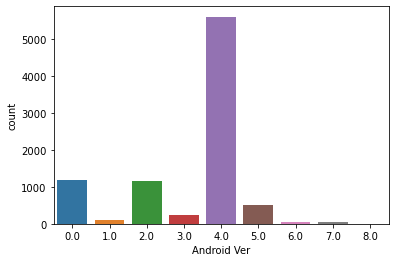

In [25]:
sns.countplot(df['Android Ver'])

In [26]:
df_max = df[df.Rating == 5]

df_max.head()    #Distribution plot of 'Installs' of Apps with 5.0 Ratings


App Category  Rating  Reviews  \
329                Hojiboy Tojiboyev Life Hacks   COMICS     5.0       15   
612               American Girls Mobile Numbers   DATING     5.0        5   
615                                Awake Dating   DATING     5.0        2   
633                       Spine- The dating app   DATING     5.0        5   
636  Girls Live Talk - Free Text and Video Chat   DATING     5.0        6   

     Size  Installs  Type  Price Content Rating  Genres    Last Updated  \
329  37.0    1000.0  Free    0.0       Everyone  Comics   June 26, 2018   
612   4.4    1000.0  Free    0.0     Mature 17+  Dating   July 17, 2018   
615  70.0     100.0  Free    0.0     Mature 17+  Dating   July 24, 2018   
633   9.3     500.0  Free    0.0           Teen  Dating   July 14, 2018   
636   5.0     100.0  Free    0.0     Mature 17+  Dating  August 1, 2018   

    Current Ver  Android Ver  
329         2.0          4.0  
612         3.0          4.0  
615       2.2.9          4.0  
633         4.0          4.0  
636         8.2          4.0

C:\Users\kavya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs', ylabel='Density'>

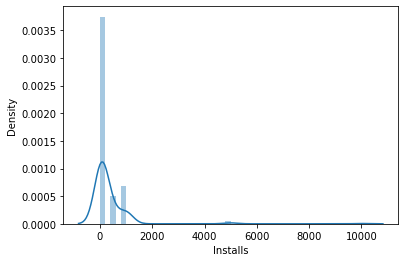

In [27]:
sns.distplot(df_max.Installs)


In [28]:
df_full_maxinstalls = df_max[df.Installs > 1000]

df_full_maxinstalls[['App', 'Category', 'Installs']]

C:\Users\kavya\AppData\Local\Temp\ipykernel_19564\3293719198.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full_maxinstalls = df_max[df.Installs > 1000]


App   Category  Installs
7514           CL Keyboard - Myanmar Keyboard (No Ads)      TOOLS    5000.0
8058                                        Oración CX  LIFESTYLE    5000.0
8260  Superheroes, Marvel, DC, Comics, TV, Movies News     COMICS    5000.0
9511                          Ek Bander Ne Kholi Dukan     FAMILY   10000.0

C:\Users\kavya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

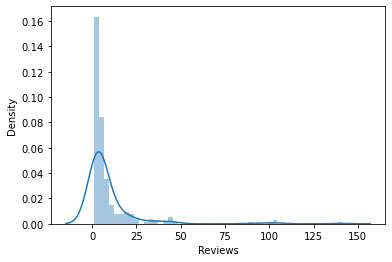

In [29]:
sns.distplot(df_max.Reviews)


C:\Users\kavya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

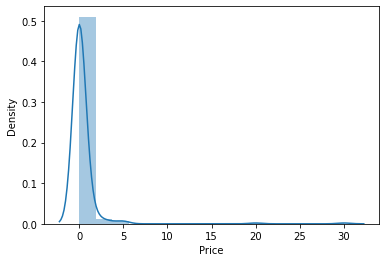

In [30]:
sns.distplot(df_max.Price)


In [31]:
df_full = df_max[df.Reviews > 50]


C:\Users\kavya\AppData\Local\Temp\ipykernel_19564\1812705553.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_full = df_max[df.Reviews > 50]


In [32]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())


No. of Apps having 5.0 Rating with sufficient Reviews:  5


C:\Users\kavya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genres', ylabel='count'>

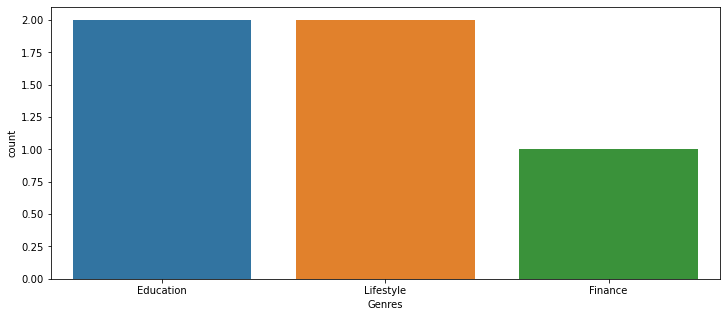

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)

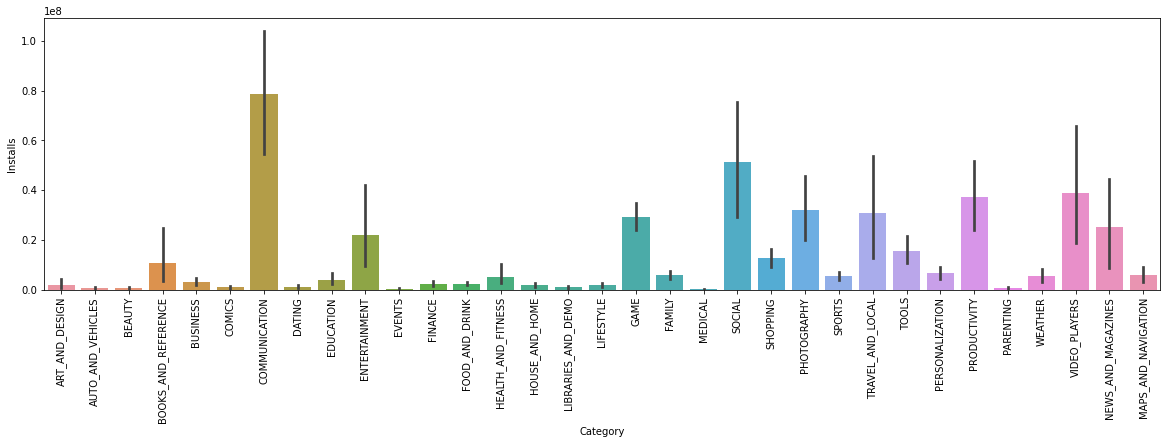

In [34]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Category', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

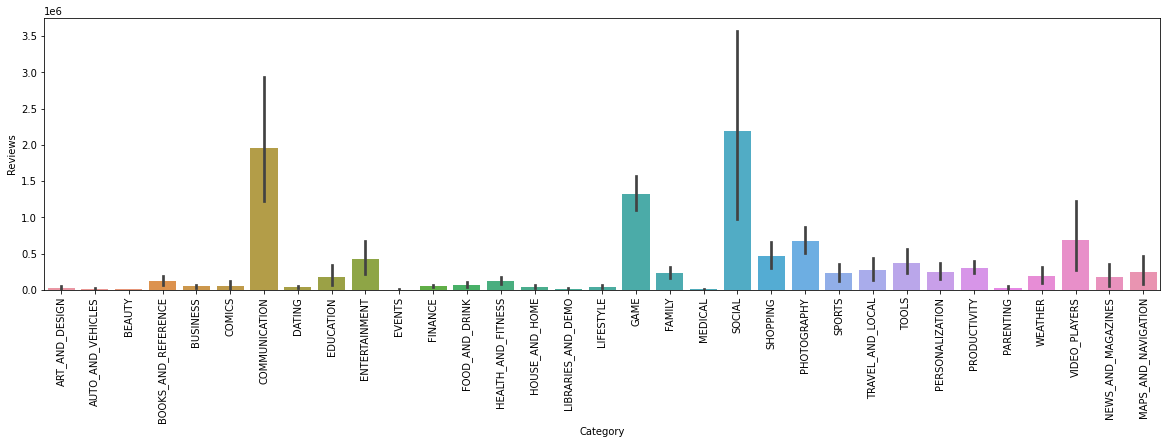

In [35]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Category', y='Reviews', data=df,ax=ax);
plt.xticks(rotation=90);

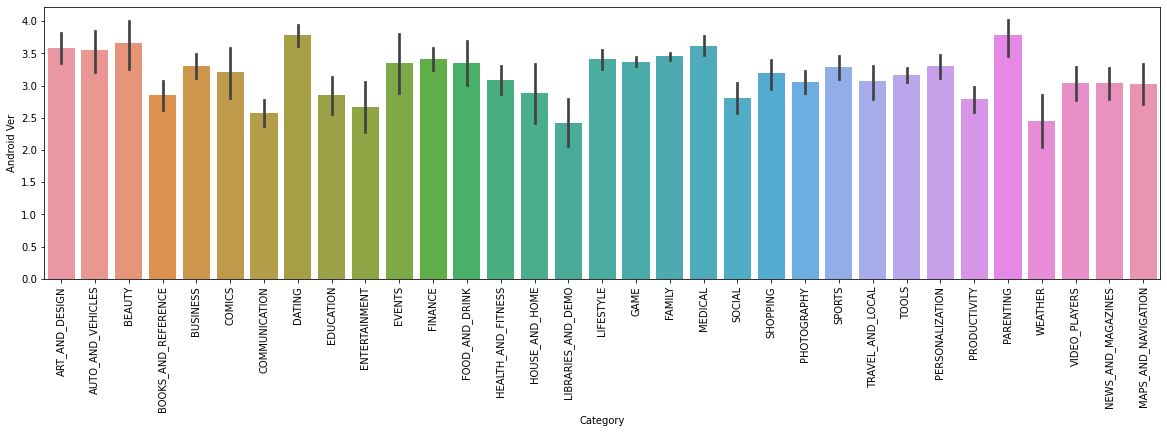

In [36]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Category', y='Android Ver', data=df,ax=ax);
plt.xticks(rotation=90);

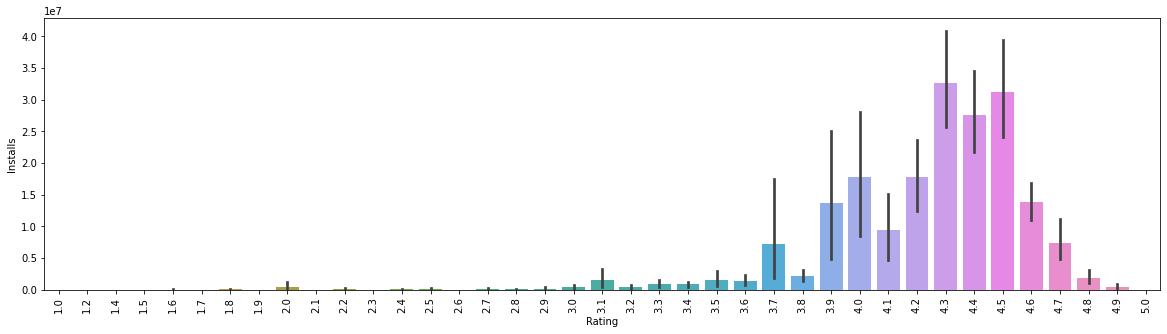

In [37]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Rating', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

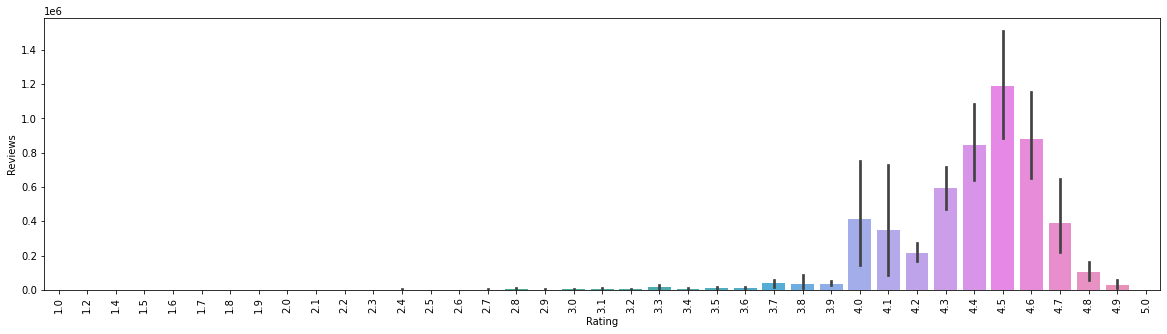

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Rating', y='Reviews', data=df,ax=ax);
plt.xticks(rotation=90);

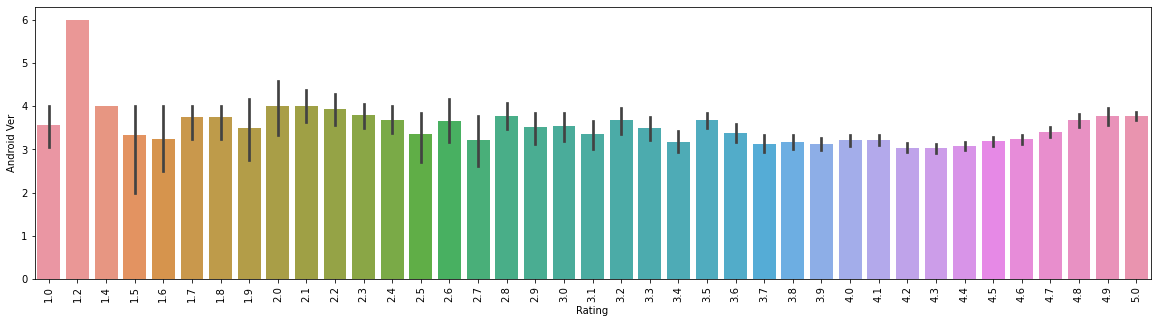

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Rating', y='Android Ver', data=df,ax=ax);
plt.xticks(rotation=90);

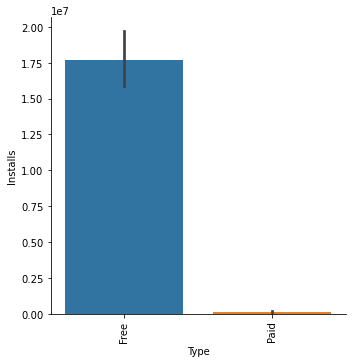

In [40]:
sns.catplot(x='Type', y='Installs', data=df,kind='bar');
plt.xticks(rotation=90);

Free apps are installed more than paid apps

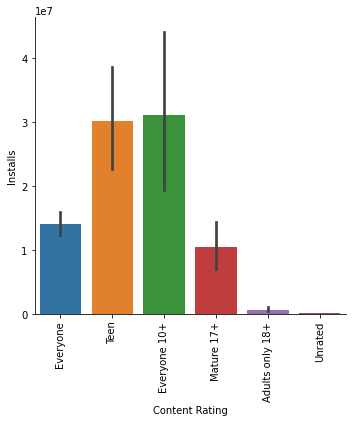

In [41]:
sns.catplot(x='Content Rating', y='Installs', data=df,kind='bar');
plt.xticks(rotation=90);

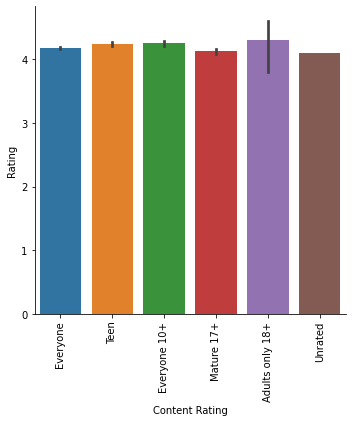

In [42]:
sns.catplot(x='Content Rating', y='Rating', data=df,kind='bar');
plt.xticks(rotation=90);

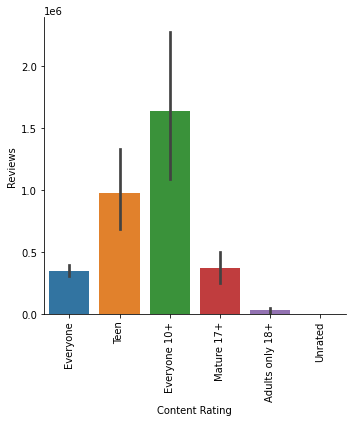

In [43]:
sns.catplot(x='Content Rating', y='Reviews', data=df,kind='bar');
plt.xticks(rotation=90);